In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
train_df = pd.read_csv('training_data.csv')

In [3]:
train_df.columns

Index(['Open(t-4)', 'Open(t-3)', 'Open(t-2)', 'Open(t-1)', 'Open(t)',
       'High(t-4)', 'High(t-3)', 'High(t-2)', 'High(t-1)', 'High(t)',
       'Low(t-4)', 'Low(t-3)', 'Low(t-2)', 'Low(t-1)', 'Low(t)',
       'Close_x(t-4)', 'Close_x(t-3)', 'Close_x(t-2)', 'Close_x(t-1)',
       'Close_x(t)', 'Close_y(t-4)', 'Close_y(t-3)', 'Close_y(t-2)',
       'Close_y(t-1)', 'Close_y(t)', 'Volume(t-4)', 'Volume(t-3)',
       'Volume(t-2)', 'Volume(t-1)', 'Volume(t)', 'Average_Likes(t-4)',
       'Average_Likes(t-3)', 'Average_Likes(t-2)', 'Average_Likes(t-1)',
       'Average_Likes(t)', 'Tweets_Volume(t-4)', 'Tweets_Volume(t-3)',
       'Tweets_Volume(t-2)', 'Tweets_Volume(t-1)', 'Tweets_Volume(t)',
       'reddit_sentiment(t-4)', 'reddit_sentiment(t-3)',
       'reddit_sentiment(t-2)', 'reddit_sentiment(t-1)', 'reddit_sentiment(t)',
       'twitter_sentiment(t-4)', 'twitter_sentiment(t-3)',
       'twitter_sentiment(t-2)', 'twitter_sentiment(t-1)',
       'twitter_sentiment(t)', 'roe', 'infl', 

## Preprocessing

### Generate Column Ordering

In [4]:
# time series columns
cols_series = ['Open', 'High', 'Low', 'Close_x', 'Close_y', 'Volume', 'Average_Likes', 'Tweets_Volume','reddit_sentiment', 'twitter_sentiment' ]
# uni value columns
cols_unival = ['roe', 'infl', 'Close_x1(t+1)']

In [5]:
col_order = []
cur = pd.Series(train_df.columns)

for col in cols_series:
    filtered = list(cur[cur.str.startswith(col)])
    if (col == 'Close_x'):
        filtered.remove('Close_x1(t+1)')
    col_order.extend(filtered)

col_order.extend(cols_unival)

In [6]:
col_order

['Open(t-4)',
 'Open(t-3)',
 'Open(t-2)',
 'Open(t-1)',
 'Open(t)',
 'High(t-4)',
 'High(t-3)',
 'High(t-2)',
 'High(t-1)',
 'High(t)',
 'Low(t-4)',
 'Low(t-3)',
 'Low(t-2)',
 'Low(t-1)',
 'Low(t)',
 'Close_x(t-4)',
 'Close_x(t-3)',
 'Close_x(t-2)',
 'Close_x(t-1)',
 'Close_x(t)',
 'Close_y(t-4)',
 'Close_y(t-3)',
 'Close_y(t-2)',
 'Close_y(t-1)',
 'Close_y(t)',
 'Volume(t-4)',
 'Volume(t-3)',
 'Volume(t-2)',
 'Volume(t-1)',
 'Volume(t)',
 'Average_Likes(t-4)',
 'Average_Likes(t-3)',
 'Average_Likes(t-2)',
 'Average_Likes(t-1)',
 'Average_Likes(t)',
 'Tweets_Volume(t-4)',
 'Tweets_Volume(t-3)',
 'Tweets_Volume(t-2)',
 'Tweets_Volume(t-1)',
 'Tweets_Volume(t)',
 'reddit_sentiment(t-4)',
 'reddit_sentiment(t-3)',
 'reddit_sentiment(t-2)',
 'reddit_sentiment(t-1)',
 'reddit_sentiment(t)',
 'twitter_sentiment(t-4)',
 'twitter_sentiment(t-3)',
 'twitter_sentiment(t-2)',
 'twitter_sentiment(t-1)',
 'twitter_sentiment(t)',
 'roe',
 'infl',
 'Close_x1(t+1)']

In [7]:
# Order the dataframe columns for scaling
train_df = train_df[col_order]

### Row MinMax Scaling

In [8]:
train_scaled = train_df.copy()

In [9]:
train_scaled.columns

Index(['Open(t-4)', 'Open(t-3)', 'Open(t-2)', 'Open(t-1)', 'Open(t)',
       'High(t-4)', 'High(t-3)', 'High(t-2)', 'High(t-1)', 'High(t)',
       'Low(t-4)', 'Low(t-3)', 'Low(t-2)', 'Low(t-1)', 'Low(t)',
       'Close_x(t-4)', 'Close_x(t-3)', 'Close_x(t-2)', 'Close_x(t-1)',
       'Close_x(t)', 'Close_y(t-4)', 'Close_y(t-3)', 'Close_y(t-2)',
       'Close_y(t-1)', 'Close_y(t)', 'Volume(t-4)', 'Volume(t-3)',
       'Volume(t-2)', 'Volume(t-1)', 'Volume(t)', 'Average_Likes(t-4)',
       'Average_Likes(t-3)', 'Average_Likes(t-2)', 'Average_Likes(t-1)',
       'Average_Likes(t)', 'Tweets_Volume(t-4)', 'Tweets_Volume(t-3)',
       'Tweets_Volume(t-2)', 'Tweets_Volume(t-1)', 'Tweets_Volume(t)',
       'reddit_sentiment(t-4)', 'reddit_sentiment(t-3)',
       'reddit_sentiment(t-2)', 'reddit_sentiment(t-1)', 'reddit_sentiment(t)',
       'twitter_sentiment(t-4)', 'twitter_sentiment(t-3)',
       'twitter_sentiment(t-2)', 'twitter_sentiment(t-1)',
       'twitter_sentiment(t)', 'roe', 'infl', 

In [10]:
# transformation dictionary to store each row's minimum value and range (max-min)
trform_list = {}

In [11]:
def minmaxscaler(index, row, in_size, num_var):
    trform_dict = {}
    trformed_row = []
    value = 0
    for i in range(num_var):
        cur = np.array(row[ i*in_size : (i+1)*in_size ])
        rowmaxmin = cur.max() - cur.min()
        print('rowmaxmin', rowmaxmin)
        rowmin = cur.min()
        print('rowmin', rowmin)
        trform_dict[i] = [rowmaxmin, rowmin]
        trform_list[index] = trform_dict
        cur = [ (x - rowmin) / (rowmaxmin) for x in cur]
        trformed_row.extend(cur)
        if (i == 3):
            target = row[-1]
            value = (target - rowmin) / rowmaxmin
    
    rest = np.array(row[ num_var*in_size : -1 ])
    trformed_row.extend(rest)
    trformed_row.append(value)
    return trformed_row
                    

In [12]:
for index, row in train_scaled.iterrows():
    trformed_row = minmaxscaler(index, row, 5, 8)
    train_scaled.loc[index] = trformed_row

rowmaxmin 4.386064828000329
rowmin 37.64469954219178
rowmaxmin 1.65090734192961
rowmin 41.35737127213854
rowmaxmin 4.66452364174642
rowmin 37.129117884311526
rowmaxmin 1.72845458984375
rowmin 40.82010269165039
rowmaxmin 86.31005859375
rowmin 2709.800048828125
rowmaxmin 465456000.0
rowmin 364944800.0
rowmaxmin 1.5851742151109245
rowmin 1.0555014605647517
rowmaxmin 2621.0
rowmin 4779.0
rowmaxmin 1.5074074219748042
rowmin 41.0629207043366
rowmaxmin 1.6066107300115746
rowmin 41.73314634803784
rowmaxmin 1.2168728441418253
rowmin 40.57676868191612
rowmaxmin 2.4664230346679688
rowmin 40.82010269165039
rowmaxmin 86.31005859375
rowmin 2709.800048828125
rowmaxmin 198640400.0
rowmin 364944800.0
rowmaxmin 0.24155930113495705
rowmin 0.864529838852488
rowmaxmin 868.0
rowmin 4779.0
rowmaxmin 2.4897590017422218
rowmin 41.0629207043366
rowmaxmin 3.8495720033273955
rowmin 41.73314634803784
rowmaxmin 2.417169543947253
rowmin 40.98307460171824
rowmaxmin 4.25848388671875
rowmin 41.234710693359375
rowmaxmin

rowmaxmin 9.072654724121094
rowmin 68.43864440917969
rowmaxmin 96.679931640625
rowmin 3191.449951171875
rowmaxmin 271125600.0
rowmin 431980400.0
rowmaxmin 1.5704793512171344
rowmin 1.2593336681734473
rowmaxmin 3080.0
rowmin 3910.0
rowmaxmin 9.079989159458236
rowmin 68.36773556838317
rowmaxmin 8.434384016812487
rowmin 69.51220920052327
rowmaxmin 7.57847308817513
rowmin 68.12074168932355
rowmaxmin 8.493080139160156
rowmin 69.4510726928711
rowmaxmin 108.330078125
rowmin 3221.2900390625
rowmaxmin 271125600.0
rowmin 431980400.0
rowmaxmin 1.3252565752767635
rowmin 1.5045564441138182
rowmaxmin 3080.0
rowmin 3910.0
rowmaxmin 7.9477457103679825
rowmin 69.61979335763229
rowmaxmin 7.179867807544781
rowmin 71.88917967901075
rowmaxmin 6.5122651035938475
rowmin 69.18694967390483
rowmaxmin 6.65411376953125
rowmin 71.2900390625
rowmaxmin 108.330078125
rowmin 3221.2900390625
rowmaxmin 241256000.0
rowmin 431980400.0
rowmaxmin 1.117548135199691
rowmin 1.7122648841908907
rowmaxmin 3080.0
rowmin 3910.0
row

rowmaxmin 14.909616150165903
rowmin 97.57614530923314
rowmaxmin 18.918444868290663
rowmin 87.64377769919417
rowmaxmin 17.615760803222656
rowmin 93.21337890625
rowmaxmin 205.25
rowmin 3155.219970703125
rowmaxmin 417303200.0
rowmin 617269600.0
rowmaxmin 2.338259070195364
rowmin 1.8331017056222365
rowmaxmin 1778.0
rowmin 7915.0
rowmaxmin 17.50456623213944
rowmin 92.77831569365618
rowmaxmin 16.762196070296653
rowmin 97.57614530923314
rowmaxmin 19.819732228498182
rowmin 87.64377769919417
rowmaxmin 19.667259216308594
rowmin 93.21337890625
rowmaxmin 142.580078125
rowmin 3239.409912109375
rowmaxmin 417303200.0
rowmin 617269600.0
rowmaxmin 2.338259070195364
rowmin 1.8331017056222365
rowmaxmin 1778.0
rowmin 7915.0
rowmaxmin 19.85116793821122
rowmin 92.77831569365618
rowmaxmin 29.265912408162038
rowmin 97.57861084985068
rowmaxmin 24.64590305097795
rowmin 87.64377769919417
rowmaxmin 30.74774932861328
rowmin 93.21337890625
rowmaxmin 191.8701171875
rowmin 3239.409912109375
rowmaxmin 365979200.0
rowm

rowmaxmin 8.418646384267788
rowmin 124.99541841041886
rowmaxmin 5.513613819556923
rowmin 129.92606644265646
rowmaxmin 6.442442745036345
rowmin 123.65159354615548
rowmaxmin 7.894958496093736
rowmin 125.34124755859376
rowmaxmin 64.669921875
rowmin 4127.990234375
rowmaxmin 116063000.0
rowmin 393788500.0
rowmaxmin 3.7083415026559265
rowmin 2.8613739922888186
rowmaxmin 2805.0
rowmin 5717.0
rowmaxmin 11.175707144105218
rowmin 122.23835765058143
rowmaxmin 8.856170259585951
rowmin 126.58351000262743
rowmaxmin 9.092908981203308
rowmin 121.00112730998852
rowmaxmin 8.256149291992173
rowmin 124.98005676269533
rowmaxmin 29.400390625
rowmin 4163.259765625
rowmaxmin 116063000.0
rowmin 393788500.0
rowmaxmin 3.7083415026559265
rowmin 2.8613739922888186
rowmaxmin 3299.0
rowmin 5223.0
rowmaxmin 11.175707144105218
rowmin 122.23835765058143
rowmaxmin 8.856170259585951
rowmin 126.58351000262743
rowmaxmin 8.737182276649847
rowmin 121.00112730998852
rowmaxmin 8.137573242187486
rowmin 124.98005676269533
rowmax

rowmaxmin 16.002594473810092
rowmin 153.5728350600115
rowmaxmin 13.06414794921875
rowmin 160.44241333007812
rowmaxmin 260.16015625
rowmin 4410.1298828125
rowmaxmin 325615500.0
rowmin 315890100.0
rowmaxmin 3.7288645506951497
rowmin 4.540701705727361
rowmaxmin 2319.0
rowmin 7211.0
rowmaxmin 14.920479093370687
rowmin 157.82167618455216
rowmaxmin 4.606229514763356
rowmin 171.28284714221417
rowmaxmin 16.002594473810092
rowmin 153.5728350600115
rowmaxmin 13.06414794921875
rowmin 160.44241333007812
rowmaxmin 261.18017578125
rowmin 4401.669921875
rowmaxmin 325615500.0
rowmin 315890100.0
rowmaxmin 3.7288645506951497
rowmin 4.540701705727361
rowmaxmin 2319.0
rowmin 7211.0
rowmaxmin 14.920479093370687
rowmin 157.82167618455216
rowmaxmin 4.303485142551693
rowmin 171.28284714221417
rowmaxmin 15.863580826297152
rowmin 153.5728350600115
rowmaxmin 13.06414794921875
rowmin 160.44241333007812
rowmaxmin 166.6796875
rowmin 4348.8701171875
rowmaxmin 365438800.0
rowmin 276066800.0
rowmaxmin 3.76289736679263

In [13]:
trform_list

{0: {0: [4.386064828000329, 37.64469954219178],
  1: [1.65090734192961, 41.35737127213854],
  2: [4.66452364174642, 37.129117884311526],
  3: [1.72845458984375, 40.82010269165039],
  4: [86.31005859375, 2709.800048828125],
  5: [465456000.0, 364944800.0],
  6: [1.5851742151109245, 1.0555014605647517],
  7: [2621.0, 4779.0]},
 1: {0: [1.5074074219748042, 41.0629207043366],
  1: [1.6066107300115746, 41.73314634803784],
  2: [1.2168728441418253, 40.57676868191612],
  3: [2.4664230346679688, 40.82010269165039],
  4: [86.31005859375, 2709.800048828125],
  5: [198640400.0, 364944800.0],
  6: [0.24155930113495705, 0.864529838852488],
  7: [868.0, 4779.0]},
 2: {0: [2.4897590017422218, 41.0629207043366],
  1: [3.8495720033273955, 41.73314634803784],
  2: [2.417169543947253, 40.98307460171824],
  3: [4.25848388671875, 41.234710693359375],
  4: [57.33984375, 2775.60009765625],
  5: [244424400.0, 364944800.0],
  6: [0.24155930113495705, 0.864529838852488],
  7: [2272.0, 4779.0]},
 3: {0: [4.51012

In [14]:
train_scaled

,Open(t-4),Open(t-3),Open(t-2),Open(t-1),Open(t),High(t-4),High(t-3),High(t-2),High(t-1),High(t),...,reddit_sentiment(t-1),reddit_sentiment(t),twitter_sentiment(t-4),twitter_sentiment(t-3),twitter_sentiment(t-2),twitter_sentiment(t-1),twitter_sentiment(t),roe,infl,Close_x1(t+1)
0,0.000000,0.912385,0.800851,0.779337,1.000000,0.000000,0.570608,0.227617,0.724460,1.000000,...,0.000000,0.000000,0.127374,0.256366,0.244529,0.207746,0.318402,0.109210,0.190660,1.426953
1,0.387128,0.062601,0.000000,0.642058,1.000000,0.352448,0.000000,0.510541,0.793678,1.000000,...,0.000000,0.000000,0.256366,0.244529,0.207746,0.318402,0.206934,0.109210,0.237069,1.894684
2,0.037901,0.000000,0.388730,0.605443,1.000000,0.000000,0.213073,0.331240,0.417348,1.000000,...,0.000000,0.000000,0.244529,0.207746,0.318402,0.206934,0.247462,0.109210,0.283478,1.040911
3,0.000000,0.214593,0.334227,0.552037,1.000000,0.000000,0.086161,0.148946,0.573785,1.000000,...,0.000000,0.000000,0.207746,0.318402,0.206934,0.247462,0.230397,0.109210,0.329887,1.172295
4,0.000000,0.124233,0.350416,0.815599,1.000000,0.000000,0.068705,0.533599,1.000000,0.758777,...,0.000000,0.000000,0.318402,0.206934,0.247462,0.230397,0.148224,0.109210,0.376296,1.575699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.654363,1.000000,0.000000,0.819390,0.535622,1.000000,0.705909,0.000000,0.475631,0.222729,...,0.000000,0.000000,0.170015,0.066024,0.093421,0.091963,0.043767,0.504836,0.367535,0.551543
196,1.000000,0.000000,0.819390,0.535622,0.269198,1.000000,0.000000,0.673784,0.315520,0.130279,...,0.000000,0.152096,0.066024,0.093421,0.091963,0.043767,0.068209,0.528813,0.304319,0.604801
197,0.000000,1.000000,0.653684,0.328535,0.563930,0.473767,1.000000,0.720192,0.575517,0.000000,...,0.152096,0.158785,0.093421,0.091963,0.043767,0.068209,0.222123,0.528813,0.202989,-2.918726
198,1.000000,0.484239,0.000000,0.350569,0.657000,1.000000,0.720192,0.575517,0.000000,0.424484,...,0.158785,0.000000,0.091963,0.043767,0.068209,0.222123,0.105450,0.528813,0.101658,-0.032608


## Training

In [15]:
score_df = pd.DataFrame(columns=['gs_cv', 'data', "MAE", "MSE", "RMSE", "R2"])

### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_scaled.drop('Close_x1(t+1)',axis=1), train_scaled['Close_x1(t+1)'] ,
                                   random_state=88, 
                                   test_size=0.25, 
                                   shuffle=False)

In [17]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)

### XGBoost without Grid Search

In [18]:
# Training without GridSearch and CV
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Accuracy on Test Data (Last 50 Days)

In [19]:
pred = model.predict(X_test)
pred_trformed = [pred[x - y_test.index[0]] * trform_list[x][3][0] + trform_list[x][3][1] for x in y_test.index]
y_trformed =  [y_test[x] * trform_list[x][3][0] + trform_list[x][3][1] for x in y_test.index]

mae = mean_absolute_error(y_trformed, pred_trformed)
mse = mean_squared_error(y_trformed, pred_trformed)
rmse = mean_squared_error(y_trformed, pred_trformed, squared=False)
r2 = r2_score(y_trformed, pred_trformed)
score_df.loc[len(score_df)] = [False, 'test', mae, mse, rmse, r2]
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)   

Mean Absolute Error: 7.94129003333147
Mean Squared Error: 92.61182484325116
Root Mean Squared Error: 9.623503771665035
R-squared: 0.4085841132517588


<AxesSubplot:>

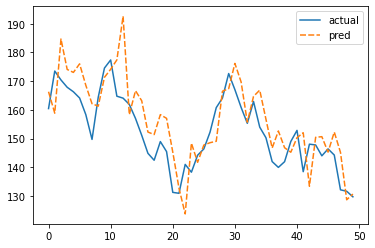

In [20]:
output = pd.DataFrame({'actual': np.array(y_trformed), 'pred': np.array(pred_trformed)})

sns.lineplot(data=output)

### Accuracy on the Complete Data (200 days)

In [21]:
validation_pred = model.predict(train_scaled.drop('Close_x1(t+1)',axis=1))
validation_y = train_scaled['Close_x1(t+1)']
v_pred_trformed = [ validation_pred[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]
v_y_trformed = [ validation_y[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]

mae = mean_absolute_error(v_y_trformed, v_pred_trformed)
mse = mean_squared_error(v_y_trformed, v_pred_trformed)
rmse = mean_squared_error(v_y_trformed, v_pred_trformed, squared=False)
r2 = r2_score(v_y_trformed, v_pred_trformed)
score_df.loc[len(score_df)] = [False, 'all', mae, mse, rmse, r2]
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)   


Mean Absolute Error: 2.206494945437115
Mean Squared Error: 33.3007280208542
Root Mean Squared Error: 5.7706782981599485
R-squared: 0.9792956900051156


<AxesSubplot:>

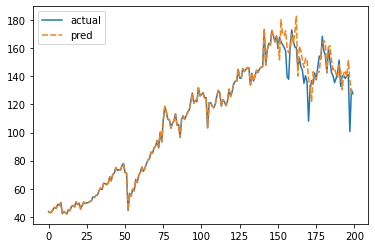

In [22]:
output = pd.DataFrame({'actual': v_y_trformed, 'pred': v_pred_trformed })
sns.lineplot(data=output)

### XGBoost with GridSearch

In [23]:
# Training with GridSearch CV to find best parameters
# Commented out due to long run time
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error
# from sklearn.utils import shuffle


# # Define parameter grid for GridSearchCV
# param_grid = {
#     'max_depth': [1,3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [50, 100, 200],
#     'min_child_weight': [1, 3, 5],
#     'gamma': [0, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
# }

# # Define XGBoost model
# model = xgb.XGBRegressor(objective='reg:squarederror')

# # Perform grid search
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Print results
# print(f'Best parameters: {grid_search.best_params_}')
# print(f'Best score: {grid_search.best_score_}')

# # Use best model to make predictions
# best_model = grid_search.best_estimator_
# predictions = best_model.predict(X_test)

# # Calculate mean squared error
# mse = mean_squared_error(y_test, predictions)
# print(f'Mean squared error: {mse}')

In [24]:
#Best Parameters and model score
#Best parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 1.0}
# Best score: -0.3857488073297765
# Mean squared error: 0.5214391717888258

In [25]:
from xgboost import XGBRegressor

best_model = XGBRegressor(colsample_bytree= 1.0, gamma= 0, learning_rate= 0.01, max_depth= 1, min_child_weight= 5, n_estimators= 200, subsample= 1.0)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Accuracy on Test Data (Last 50 Days)

In [26]:
pred = best_model.predict(X_test)
pred_trformed = [pred[x - y_test.index[0]] * trform_list[x][3][0] + trform_list[x][3][1] for x in y_test.index]
y_trformed =  [y_test[x] * trform_list[x][3][0] + trform_list[x][3][1] for x in y_test.index]

mae = mean_absolute_error(y_trformed, pred_trformed)
mse = mean_squared_error(y_trformed, pred_trformed)
rmse = mean_squared_error(y_trformed, pred_trformed, squared=False)
r2 = r2_score(y_trformed, pred_trformed)
score_df.loc[len(score_df)] = [True, 'test', mae, mse, rmse, r2]
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)   

Mean Absolute Error: 7.388987834681134
Mean Squared Error: 68.11317348185325
Root Mean Squared Error: 8.253070548702055
R-squared: 0.5650316472849141


<AxesSubplot:>

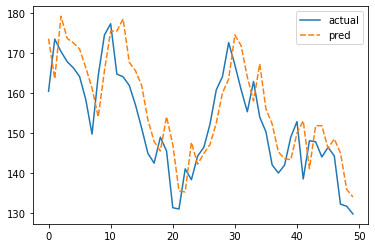

In [27]:
output = pd.DataFrame({'actual': np.array(y_trformed), 'pred': np.array(pred_trformed)})

sns.lineplot(data=output)

### Accuracy on the Complete Data (200 days)

In [28]:
validation_pred = best_model.predict(train_scaled.drop('Close_x1(t+1)',axis=1))
validation_y = train_scaled['Close_x1(t+1)']
v_pred_trformed = [ validation_pred[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]
v_y_trformed = [ validation_y[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]

mae = mean_absolute_error(v_y_trformed, v_pred_trformed)
mse = mean_squared_error(v_y_trformed, v_pred_trformed)
rmse = mean_squared_error(v_y_trformed, v_pred_trformed, squared=False)
r2 = r2_score(v_y_trformed, v_pred_trformed)
score_df.loc[len(score_df)] = [True, 'all', mae, mse, rmse, r2]
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)   


Mean Absolute Error: 4.339050668359416
Mean Squared Error: 45.277242636081965
Root Mean Squared Error: 6.728836648045631
R-squared: 0.9718494422505124


<AxesSubplot:>

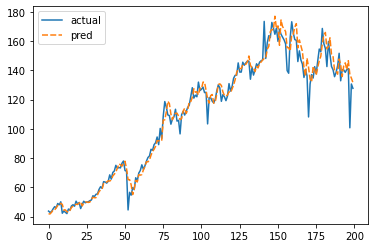

In [29]:
output = pd.DataFrame({'actual': v_y_trformed, 'pred': v_pred_trformed })
sns.lineplot(data=output)

In [30]:
score_df

,gs_cv,data,MAE,MSE,RMSE,R2
0,False,test,7.941290,92.611825,9.623504,0.408584
1,False,all,2.206495,33.300728,5.770678,0.979296
2,True,test,7.388988,68.113173,8.253071,0.565032
3,True,all,4.339051,45.277243,6.728837,0.971849


### Predict Next 4 Weeks

In [46]:
train_df1 = pd.read_csv('training_data1.csv')
train_df1.drop('Unnamed: 0', axis=1, inplace=True)

In [47]:
train_df1.columns

Index(['Open(t-7)', 'Open(t-6)', 'Open(t-5)', 'Open(t-4)', 'Open(t-3)',
       'Open(t-2)', 'Open(t-1)', 'Open(t)', 'High(t-7)', 'High(t-6)',
       'High(t-5)', 'High(t-4)', 'High(t-3)', 'High(t-2)', 'High(t-1)',
       'High(t)', 'Low(t-7)', 'Low(t-6)', 'Low(t-5)', 'Low(t-4)', 'Low(t-3)',
       'Low(t-2)', 'Low(t-1)', 'Low(t)', 'Close_x(t-7)', 'Close_x(t-6)',
       'Close_x(t-5)', 'Close_x(t-4)', 'Close_x(t-3)', 'Close_x(t-2)',
       'Close_x(t-1)', 'Close_x(t)', 'Close_y(t-7)', 'Close_y(t-6)',
       'Close_y(t-5)', 'Close_y(t-4)', 'Close_y(t-3)', 'Close_y(t-2)',
       'Close_y(t-1)', 'Close_y(t)', 'Volume(t-7)', 'Volume(t-6)',
       'Volume(t-5)', 'Volume(t-4)', 'Volume(t-3)', 'Volume(t-2)',
       'Volume(t-1)', 'Volume(t)', 'reddit_sentiment(t-7)',
       'reddit_sentiment(t-6)', 'reddit_sentiment(t-5)',
       'reddit_sentiment(t-4)', 'reddit_sentiment(t-3)',
       'reddit_sentiment(t-2)', 'reddit_sentiment(t-1)', 'reddit_sentiment(t)',
       'twitter_sentiment(t-7)', 'tw

In [48]:
train_scaled = train_df1.copy()

In [49]:
# transformation dictionary to store each row's minimum value and range (max-min)
trform_list = {}

In [54]:
train_scaled[['Close_x1(t+2)', 'Close_x1(t+3)', 'Close_x1(t+4)']]

,Close_x1(t+2),Close_x1(t+3),Close_x1(t+4)
0,49.507305,50.443695,44.936687
1,50.443695,44.936687,44.470943
2,44.936687,44.470943,43.470226
3,44.470943,43.470226,42.093044
4,43.470226,42.093044,46.775974
...,...,...,...
186,147.784348,144.000137,146.406464
187,144.000137,146.406464,144.269730
188,146.406464,144.269730,132.168198
189,144.269730,132.168198,131.658981


In [57]:
def minmaxscalerV2(index, row, in_size, num_var):
    trform_dict = {}
    trformed_row = []
    value = []
    for i in range(num_var):
        cur = np.array(row[ i*in_size : (i+1)*in_size ])
        rowmaxmin = cur.max() - cur.min()
        print('rowmaxmin', rowmaxmin)
        rowmin = cur.min()
        print('rowmin', rowmin)
        trform_dict[i] = [rowmaxmin, rowmin]
        trform_list[index] = trform_dict
        cur = [ (x - rowmin) / (rowmaxmin) for x in cur]
        trformed_row.extend(cur)
        if (i == 3):
            target = row[-4:]
            value = [(x - rowmin) / (rowmaxmin) for x in target] 
    
    rest = np.array(row[ num_var*in_size : -4 ])
    trformed_row.extend(rest)
    trformed_row.extend(value)
    return trformed_row

In [58]:
for index, row in train_scaled.iterrows():
    trformed_row = minmaxscalerV2(index, row, 8, 5)
    train_scaled.loc[index] = trformed_row

rowmaxmin 7.406384232928502
rowmin 41.0629207043366
rowmaxmin 6.528074461125549
rowmin 42.55338741424397
rowmaxmin 6.465162379591014
rowmin 41.00968935483921
rowmaxmin 6.259498596191399
rowmin 42.15657424926758
rowmaxmin 122.280029296875
rowmin 2783.300048828125
rowmaxmin 6.438540567072991
rowmin 42.03076437019211
rowmaxmin 6.578874984491328
rowmin 43.00827861406815
rowmaxmin 7.031342305215908
rowmin 41.01210934001684
rowmaxmin 6.93939208984375
rowmin 42.54855728149414
rowmaxmin 124.669921875
rowmin 2783.300048828125
rowmaxmin 6.893422414002565
rowmin 42.5703281263114
rowmaxmin 7.103929615553824
rowmin 43.339757078049416
rowmaxmin 7.892715665489575
rowmin 41.01210934001684
rowmaxmin 6.2207794189453125
rowmin 43.28652572631836
rowmaxmin 159.72998046875
rowmin 2783.300048828125
rowmaxmin 5.911070834235147
rowmin 43.55267970607882
rowmaxmin 6.513559874815776
rowmin 45.58271835136524
rowmaxmin 5.504580859840921
rowmin 43.400244145665496
rowmaxmin 4.95050048828125
rowmin 45.493194580078125


rowmaxmin 253.159912109375
rowmin 3281.06005859375
rowmaxmin 19.777425654506942
rowmin 110.98218428645436
rowmaxmin 22.318552626890522
rowmin 113.58240524833371
rowmaxmin 19.65186938423338
rowmin 101.54653215439926
rowmaxmin 18.67431640625
rowmin 108.4213638305664
rowmaxmin 253.159912109375
rowmin 3281.06005859375
rowmaxmin 19.777425654506942
rowmin 110.98218428645436
rowmaxmin 22.318552626890522
rowmin 113.58240524833371
rowmaxmin 12.370757416872877
rowmin 101.54653215439926
rowmaxmin 14.104217529296875
rowmin 108.4213638305664
rowmaxmin 253.159912109375
rowmin 3281.06005859375
rowmaxmin 12.40029911610776
rowmin 110.98218428645436
rowmaxmin 9.918272752178368
rowmin 113.58240524833371
rowmaxmin 12.370757416872877
rowmin 101.54653215439926
rowmaxmin 15.394485473632798
rowmin 107.13109588623048
rowmaxmin 253.159912109375
rowmin 3281.06005859375
rowmaxmin 15.374813853185643
rowmin 108.00766954937647
rowmaxmin 9.918272752178368
rowmin 113.58240524833371
rowmaxmin 12.370757416872877
rowmin 

rowmaxmin 342.43994140625
rowmin 4173.10986328125
rowmaxmin 22.75076269559537
rowmin 149.99139258232748
rowmaxmin 13.160261911259056
rowmin 162.4260703735068
rowmaxmin 20.240200183104633
rowmin 149.19621570320402
rowmaxmin 24.829605102539062
rowmin 149.71307373046875
rowmaxmin 402.41015625
rowmin 4173.10986328125
rowmaxmin 25.634714678517355
rowmin 149.99139258232748
rowmaxmin 16.102453008989983
rowmin 162.4260703735068
rowmaxmin 21.708492508672805
rowmin 149.19621570320402
rowmaxmin 27.652496337890625
rowmin 149.71307373046875
rowmaxmin 409.5302734375
rowmin 4173.10986328125
rowmaxmin 26.43982544556127
rowmin 149.99139258232748
rowmaxmin 16.102453008989983
rowmin 162.4260703735068
rowmaxmin 21.708492508672805
rowmin 149.19621570320402
rowmaxmin 27.652496337890625
rowmin 149.71307373046875
rowmaxmin 409.5302734375
rowmin 4173.10986328125
rowmaxmin 26.43982544556127
rowmin 149.99139258232748
rowmaxmin 16.102453008989983
rowmin 162.4260703735068
rowmaxmin 21.708492508672805
rowmin 149.19

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_scaled.drop(columns=['Close_x1(t+1)', 'Close_x1(t+2)', 'Close_x1(t+3)', 'Close_x1(t+4)'],axis=1), train_scaled[['Close_x1(t+1)', 'Close_x1(t+2)', 'Close_x1(t+3)', 'Close_x1(t+4)']] ,
                                   random_state=88, 
                                   test_size=0.25, 
                                   shuffle=False)

In [72]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)

In [73]:
#Training with GridSearch CV to find best parameters
#Commented out due to long run time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle


# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [1,3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Define XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print results
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

# Use best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print(f'Mean squared error: {mse}')

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 1.0}
Best score: -0.3303854329897229
Mean squared error: 0.3831961731907749


In [ ]:
# Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 1.0}
# Best score: -0.3303854329897229
# Mean squared error: 0.3831961731907749

In [74]:
from xgboost import XGBRegressor

best_model = XGBRegressor(colsample_bytree= 0.8, gamma= 0.2, learning_rate= 0.1, max_depth= 3, min_child_weight= 5, n_estimators= 50, subsample= 1.0)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [77]:
pred

array([[ 0.79814625,  0.33890855, -0.06154185,  0.17634949],
       [ 0.5664747 ,  0.4115671 , -0.10349749,  0.4916462 ],
       [ 0.12416421,  0.03736322, -0.31231087,  0.36913872],
       [ 0.54815257,  0.46794292,  1.0365465 ,  0.7448477 ],
       [ 0.62698036,  0.4804852 ,  0.7360223 ,  0.6978174 ],
       [ 0.49222234,  0.5479862 ,  0.64711595,  0.80313015],
       [ 0.4458002 ,  0.6067581 ,  0.96604866,  1.0045508 ],
       [ 0.21739833,  0.34283763,  0.40832612,  0.6341895 ],
       [ 0.25103912,  0.276922  ,  0.19022   ,  0.61486274],
       [ 0.20252483,  0.34632778,  0.5835874 ,  0.5848185 ],
       [ 0.60871595,  0.51067764,  0.56344414,  0.59391385],
       [ 0.941576  ,  1.1072764 ,  1.0134379 ,  0.92385226],
       [ 0.90514183,  1.2210344 ,  1.2430739 ,  1.1678548 ],
       [ 0.54290533,  0.5725765 ,  0.6616208 ,  1.0405983 ],
       [ 0.43763223,  0.65515214,  0.43152833,  0.6203606 ],
       [ 0.42512134,  0.5101384 ,  0.3407209 ,  0.8864361 ],
       [ 0.3398672 ,  0.

In [78]:
y_test

,Close_x1(t+1),Close_x1(t+2),Close_x1(t+3),Close_x1(t+4)
143,0.589345,0.063389,0.667893,0.524576
144,0.063389,0.667893,0.524576,0.406760
145,0.645416,0.492399,0.366610,0.289023
146,0.492399,0.366610,0.289023,0.181971
147,0.366610,0.289023,0.181971,-0.103826
148,0.289023,0.181971,-0.103826,-0.530068
149,0.181971,-0.103826,-0.530068,0.194739
150,-0.160866,-0.821281,0.301727,1.079310
151,-0.568899,0.398489,1.068320,1.254456
152,0.616603,1.043546,1.162188,0.632059


In [79]:
pred = best_model.predict(X_test)


pred_trformed = [ [pred[x - y_test.index[0]][z] * trform_list[x][3][0] + trform_list[x][3][1] for z in range(4) ]for x in y_test.index]
y_trformed =  [ [y_test.loc[x][z] * trform_list[x][3][0] + trform_list[x][3][1] for z in range(4)] for x in y_test.index]

mae = mean_absolute_error(y_trformed, pred_trformed)
mse = mean_squared_error(y_trformed, pred_trformed)
rmse = mean_squared_error(y_trformed, pred_trformed, squared=False)
r2 = r2_score(y_trformed, pred_trformed)
score_df.loc[len(score_df)] = [False, 'test', mae, mse, rmse, r2]
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)   

Mean Absolute Error: 11.355179547742404
Mean Squared Error: 187.06995832847358
Root Mean Squared Error: 13.251159770572595
R-squared: -0.25994604901793794


<AxesSubplot:>

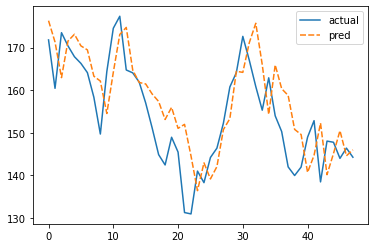

In [81]:
output1 = pd.DataFrame({'actual': list(map(lambda x:x[0], y_trformed)), 'pred': list(map(lambda x:x[0], pred_trformed)) })
sns.lineplot(data=output1)

<AxesSubplot:>

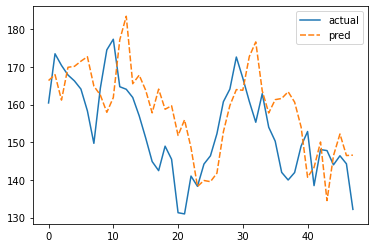

In [82]:
output2 = pd.DataFrame({'actual': list(map(lambda x:x[1], y_trformed)), 'pred': list(map(lambda x:x[1], pred_trformed)) })
sns.lineplot(data=output2)

<AxesSubplot:>

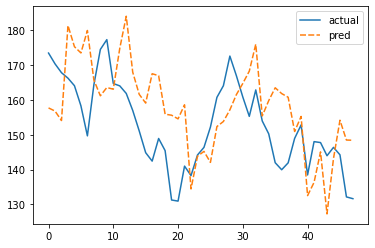

In [83]:
output3 = pd.DataFrame({'actual': list(map(lambda x:x[2], y_trformed)), 'pred': list(map(lambda x:x[2], pred_trformed)) })
sns.lineplot(data=output3)

<AxesSubplot:>

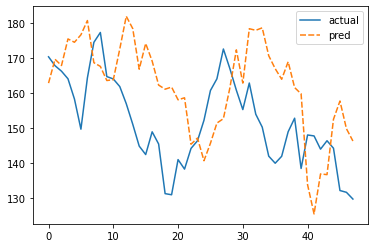

In [84]:
output4 = pd.DataFrame({'actual': list(map(lambda x:x[3], y_trformed)), 'pred': list(map(lambda x:x[3], pred_trformed)) })
sns.lineplot(data=output4)